## Customer Banking Churn Prediction 




In this project, I undetook an attempt to predict whether a customer leaves a bank or not, which is based on various factors.
The factors considered are :

1.   Credit Score
2.   Location
1.   Gender
2.   Age
1.  Tenure
2.   Account Balance
1.   Number of bank products a customer uses
2.   Has a credit Card or not
1.  Is Active Member
2.   Estimated Salary

In [49]:
import numpy as np
import pandas as pd

In [50]:
df=pd.read_csv("Churn_Modelling.csv") #read the CSV File

In [51]:
df.head() 

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [52]:
df.shape #to check number of rows and columns

(10000, 14)

In [6]:
df.columns #prints name of columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [53]:
df.dtypes #to check datatypes of columns to avoid incorrect data types error

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [54]:
print(df['Tenure'].unique())
print(df['Gender'].unique())
print(df['HasCrCard'].unique())
print(df['NumOfProducts'].unique())
print(df['Geography'].unique()) #prints all the unique values in given columns 

[ 2  1  8  7  4  6  3 10  5  9  0]
['Female' 'Male']
[1 0]
[1 3 2 4]
['France' 'Spain' 'Germany']


In [55]:
df.isnull().sum() # we tried to find which coloumn has how many unfilled rows

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [56]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [57]:
final_dataset=df[['CreditScore','Geography','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Exited']]
final_dataset.head() #to get rid of unwanted columns that might hinder the precision the prediction model

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [58]:
final_dataset=pd.get_dummies(final_dataset) #as Machine doesnt understand the values such as "Germany" or "Male"
#we chose to do OneHot Encoding to create new columns pertaining to unique values of teh columns 
columns_to_replace = ['Gender_Male','Geography_France', 'Geography_Germany', 'Geography_Spain']
mapping = {True: 1, False: 0}
final_dataset[columns_to_replace] = final_dataset[columns_to_replace].replace(mapping)
final_dataset.head() #the values stored in the newer columns are boolean and we want those values to be in discrete data 
#thus we map out those values and replace by 1 or 0

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,True,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,True,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,True,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,True,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,True,0


In [13]:
newcolumns=['CreditScore','Age','Gender_Male','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Geography_France','Geography_Germany','Geography_Spain','Exited']
final_dataset=final_dataset[newcolumns] #to change the order of the Columns after One Hot Encoding 

In [14]:
import seaborn as sns

C:\Users\akshat shrinate\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


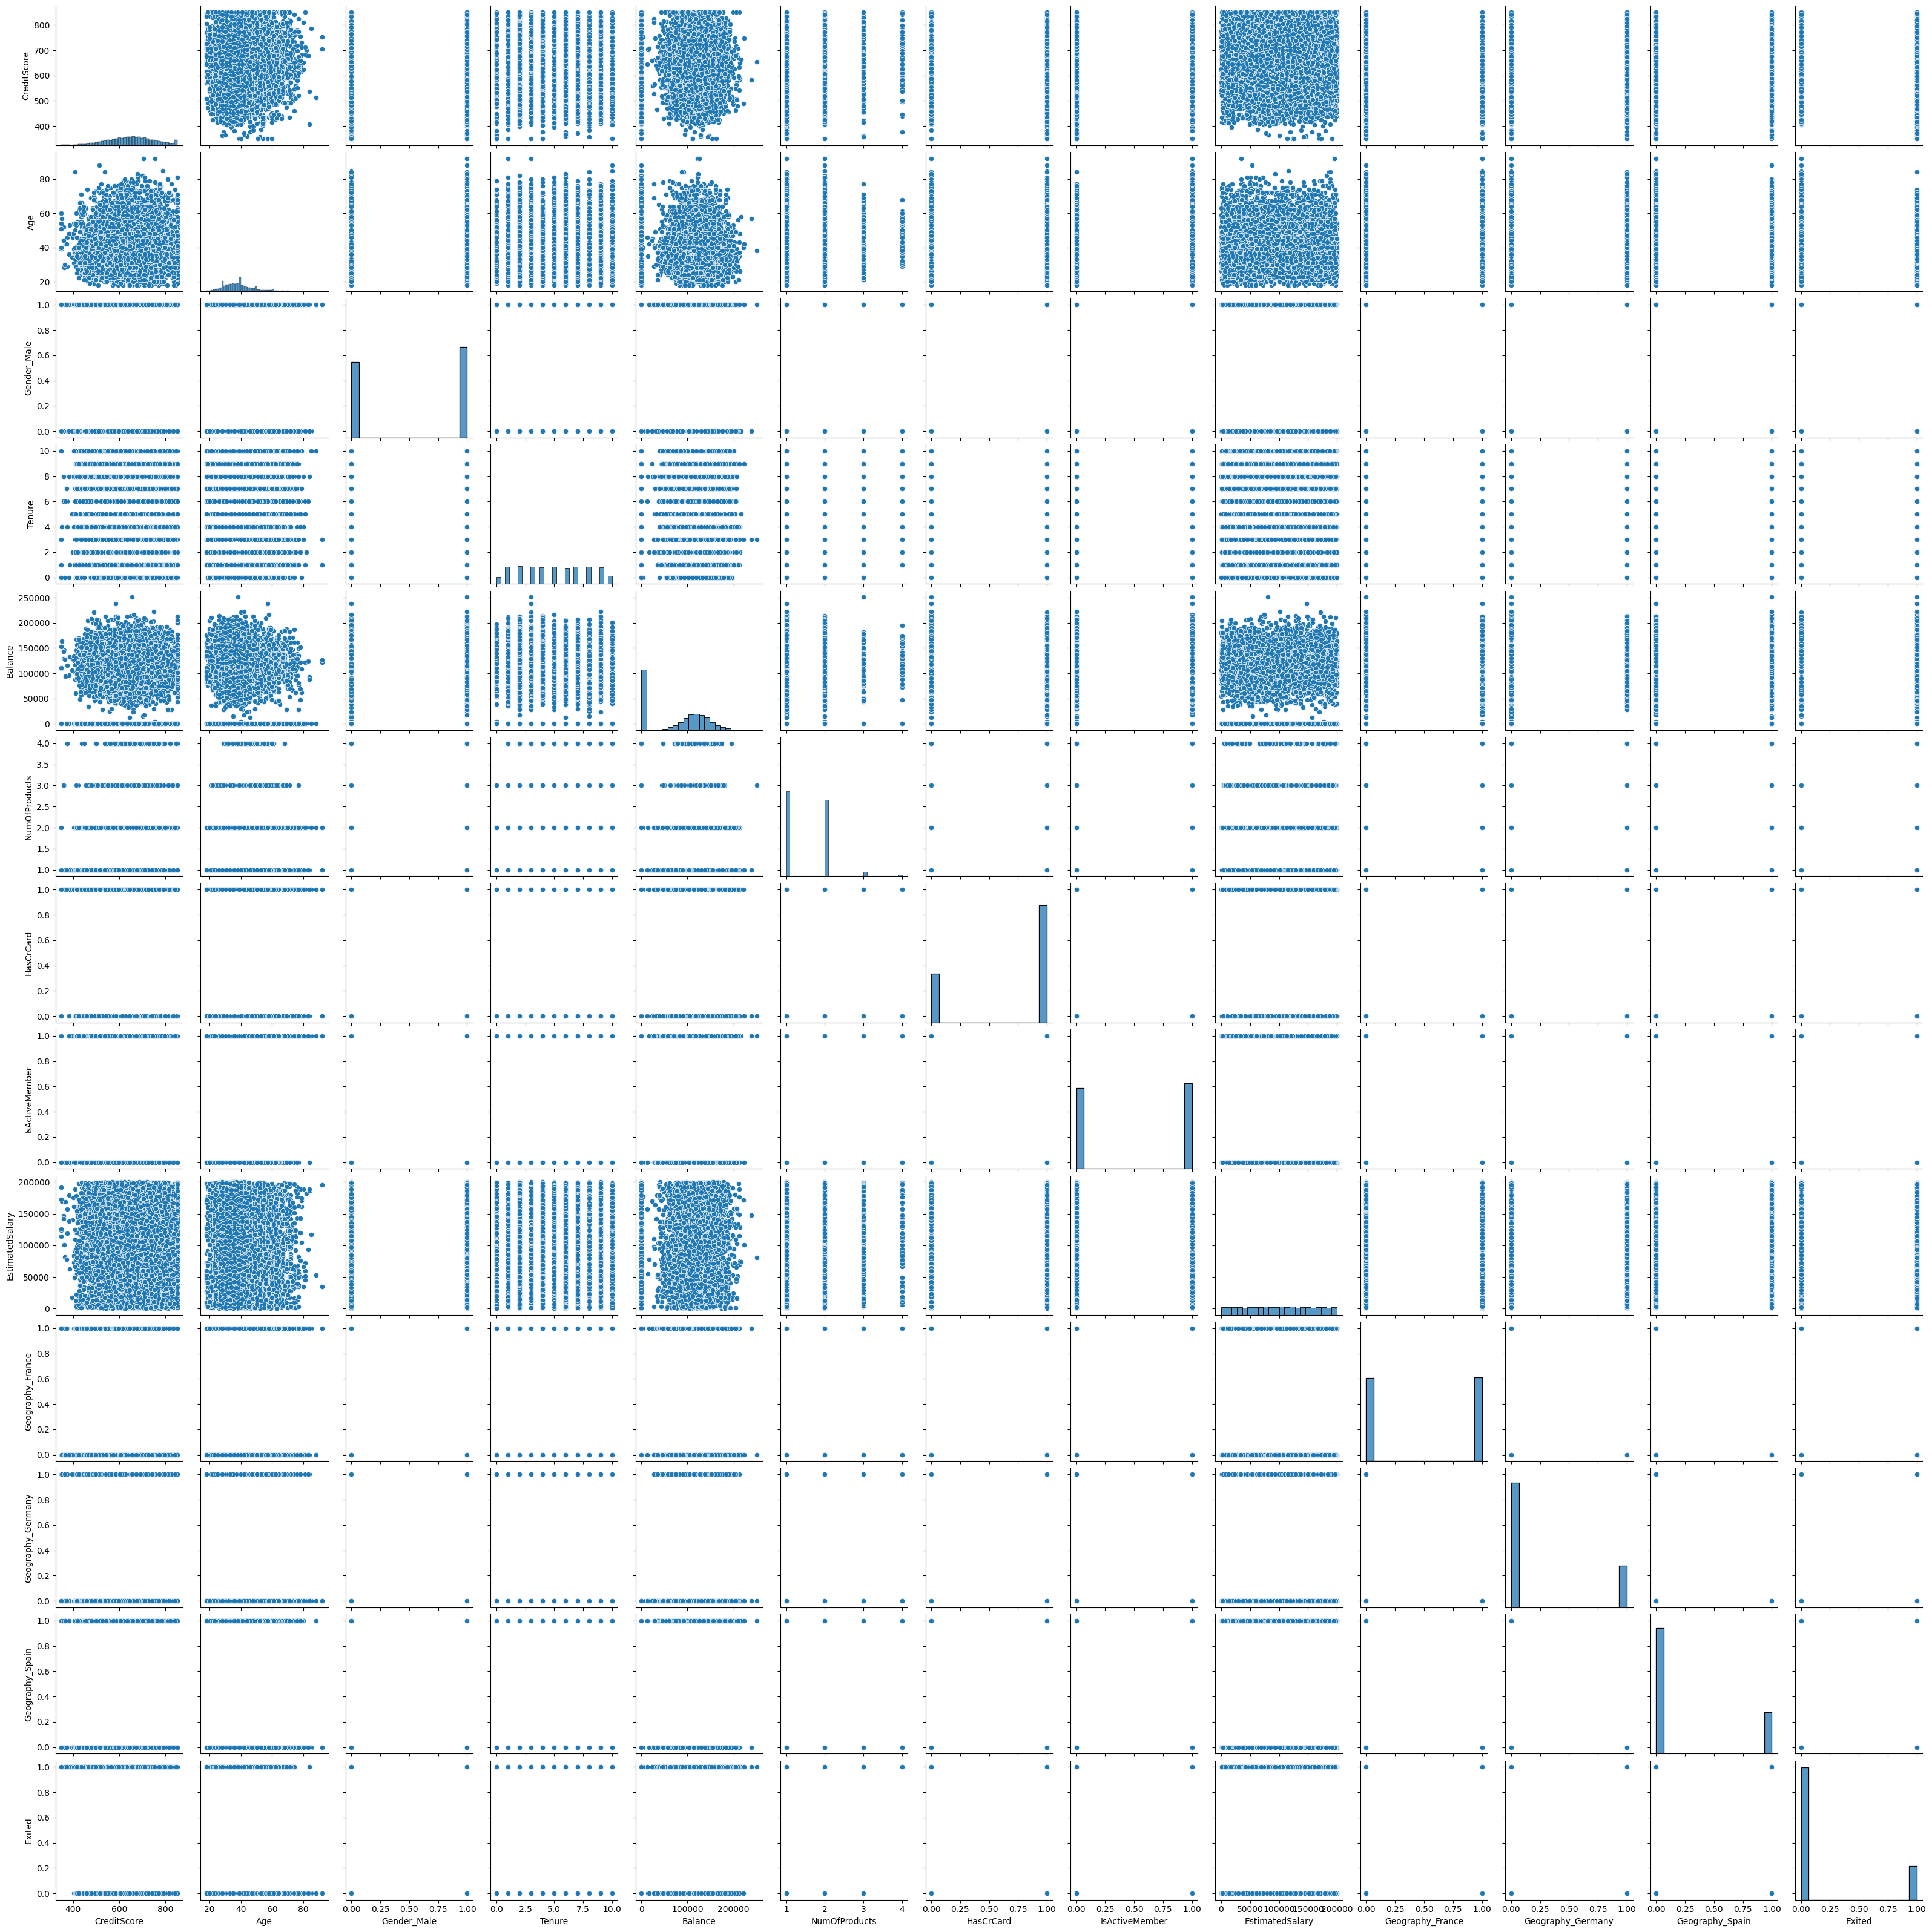

In [15]:
sns.pairplot(final_dataset)

In [24]:
import matplotlib.pyplot as pt

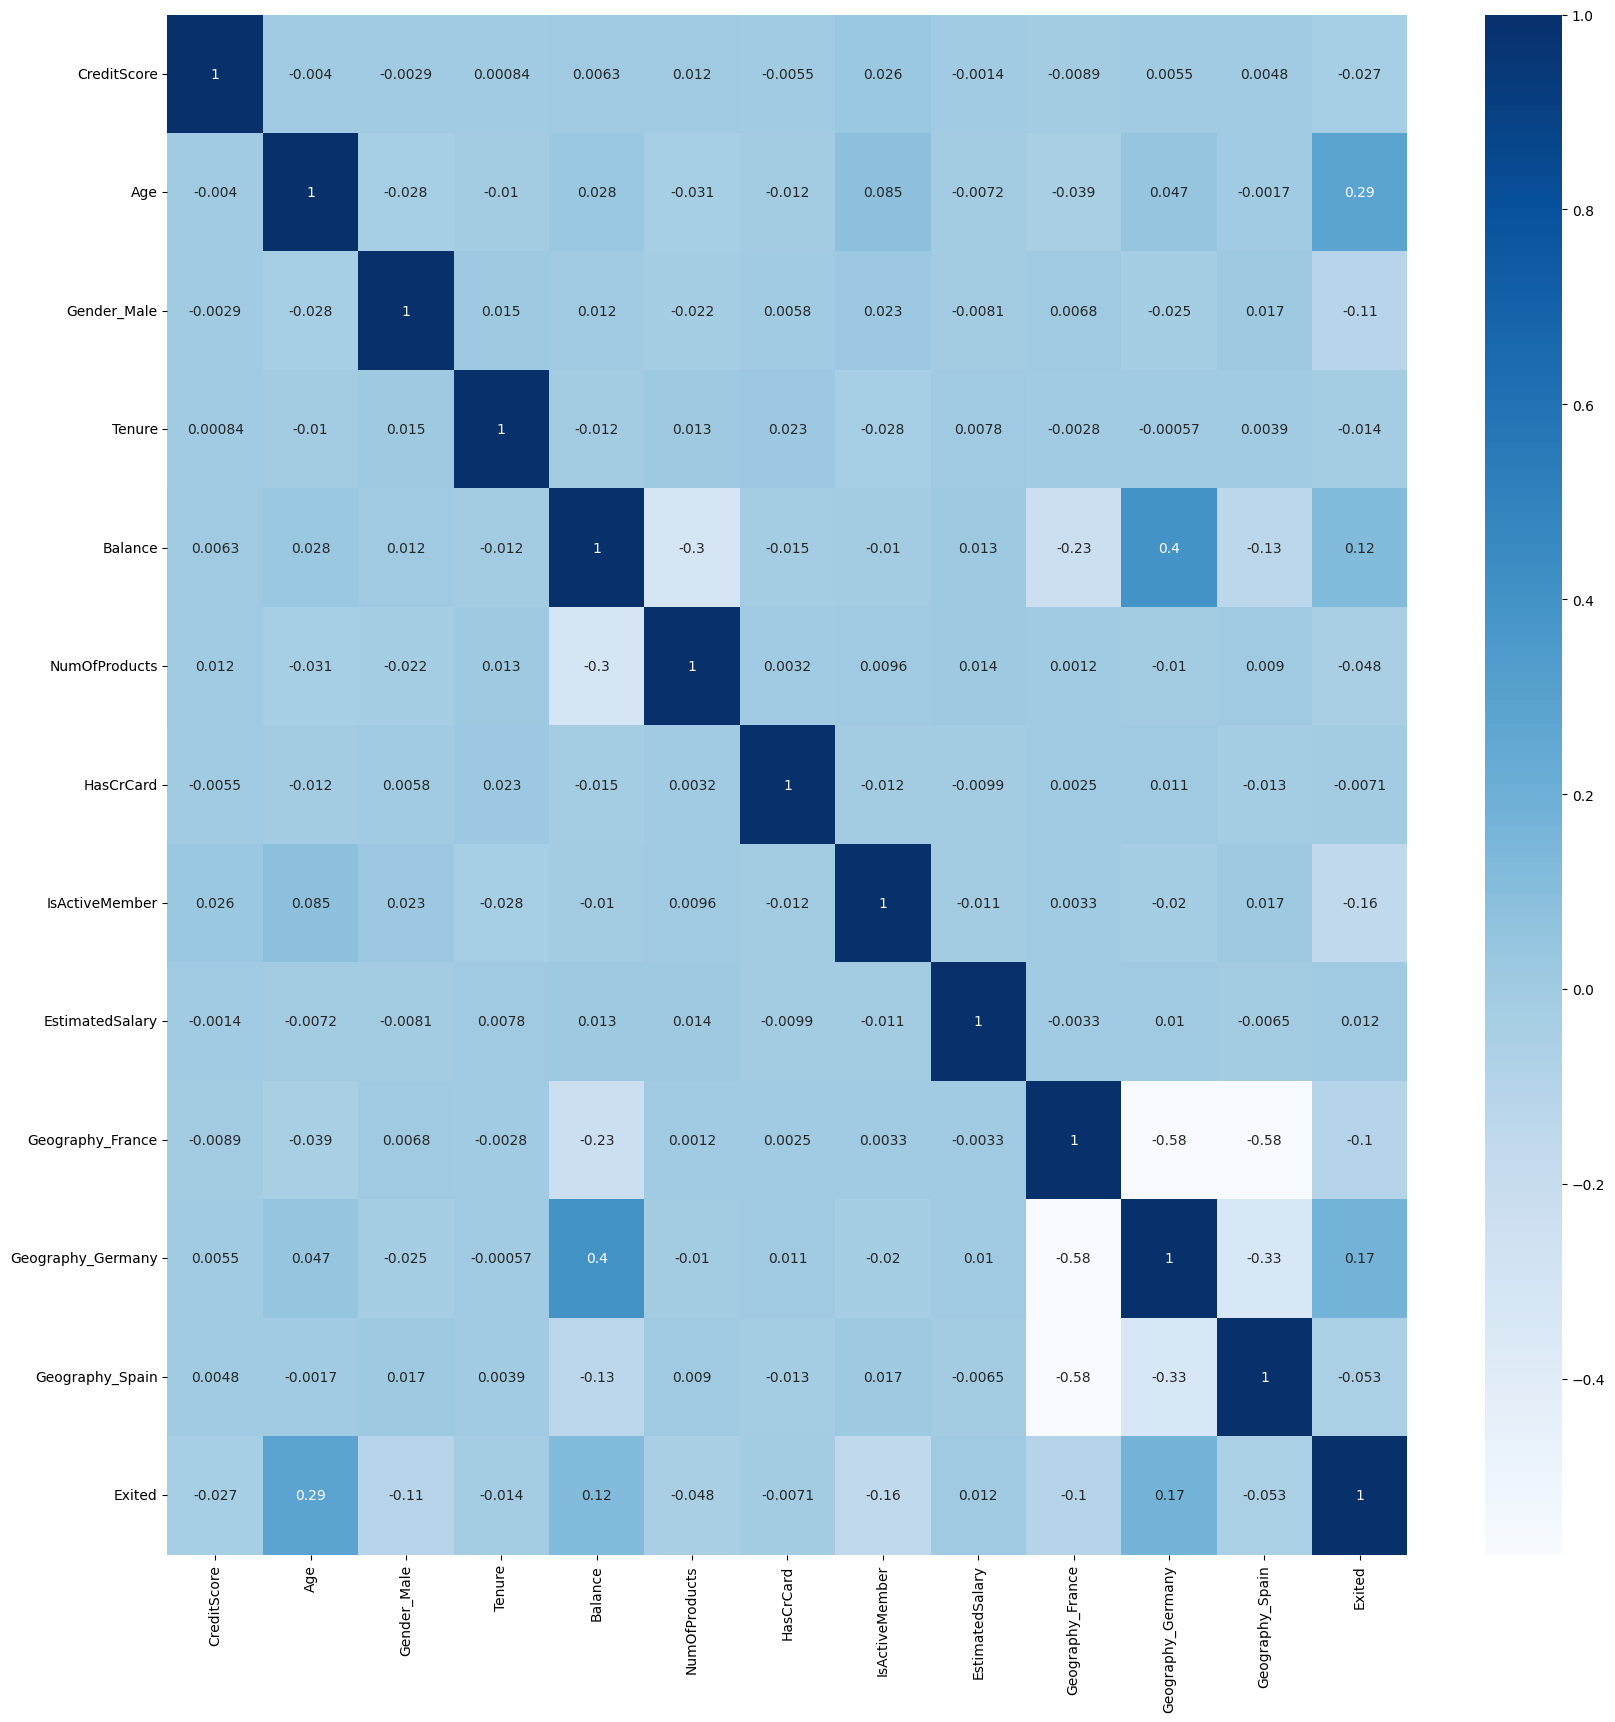

In [17]:
corrmat = final_dataset.corr()
top_corr_features = corrmat.index

pt.figure(figsize=(20, 20))
sns.heatmap(final_dataset[top_corr_features].corr(), annot=True,cmap="Blues")
pt.show()
#after analysis of the heatmap we notice that columns Age, Balance and Geography have proven to be the most 
#influential columns for prediction of the Churning 

In [25]:
#In the heatmap,darker shades of blue show for the corresponding
# relationship with Exited column thus they are the most important attribute


In [26]:
final_dataset.head()

,CreditScore,Age,Gender_Male,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Exited
0,619,42,0,2,0.00,1,1,1,101348.88,1,0,0,1
1,608,41,0,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,0,8,159660.80,3,1,0,113931.57,1,0,0,1
3,699,39,0,1,0.00,2,0,0,93826.63,1,0,0,0
4,850,43,0,2,125510.82,1,1,1,79084.10,0,0,1,0


In [27]:
X = final_dataset.iloc[:, 0:12]
Y=final_dataset.iloc[:,12].values #to split the data into groups: X- that help in prediciting Data and Y-the data to be predicted

In [28]:
X

,CreditScore,Age,Gender_Male,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,619,42,0,2,0.00,1,1,1,101348.88,1,0,0
1,608,41,0,1,83807.86,1,0,1,112542.58,0,0,1
2,502,42,0,8,159660.80,3,1,0,113931.57,1,0,0
3,699,39,0,1,0.00,2,0,0,93826.63,1,0,0
4,850,43,0,2,125510.82,1,1,1,79084.10,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,1,5,0.00,2,1,0,96270.64,1,0,0
9996,516,35,1,10,57369.61,1,1,1,101699.77,1,0,0
9997,709,36,0,7,0.00,1,0,1,42085.58,1,0,0
9998,772,42,1,3,75075.31,2,1,0,92888.52,0,1,0


In [29]:
Y

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [59]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [60]:
from sklearn.preprocessing import StandardScaler
Sdc=StandardScaler()
X_train=Sdc.fit_transform(X_train)
X_test=Sdc.transform(X_test)

In [61]:
X_train

array([[ 0.35649971, -0.6557859 ,  0.91324755, ...,  1.00150113,
        -0.57946723, -0.57638802],
       [-0.20389777,  0.29493847,  0.91324755, ..., -0.99850112,
         1.72572313, -0.57638802],
       [-0.96147213, -1.41636539,  0.91324755, ..., -0.99850112,
        -0.57946723,  1.73494238],
       ...,
       [ 0.86500853, -0.08535128, -1.09499335, ...,  1.00150113,
        -0.57946723, -0.57638802],
       [ 0.15932282,  0.3900109 ,  0.91324755, ...,  1.00150113,
        -0.57946723, -0.57638802],
       [ 0.47065475,  1.15059039,  0.91324755, ..., -0.99850112,
         1.72572313, -0.57638802]])

In [62]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X,Y)

LogisticRegression()

In [63]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,Y_train) 

RandomForestClassifier()

In [64]:
Y_pred=rfc.predict(X_test)

In [65]:
from sklearn.metrics import accuracy_score,confusion_matrix
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
print(accuracy_score(Y_test,Y_pred))
#to check for the accuracy and precision, we create confusion matrix and accuracy_score 

[[1548   59]
 [ 208  185]]
0.8665


In [66]:
import pickle 
file=open("Customer_Churn_Prediction.pkl",'wb')
pickle.dump(rfc,file) #create a file and we write/store our prediction model in it 